<a href="https://colab.research.google.com/github/SuibhneOFoighil/vail-resorts-visualizations/blob/main/climate_map_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Install dependencies
!pip install pandas
!pip install matplotlib
!pip install geopandas
!pip install geoviews

import geopandas as gpd
import geoviews as gv
import cartopy.crs as crs
import pandas as pd
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 49.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 52.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 KB 4.9 MB/s eta 0:00:00
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires click<8.0,>=5.1, but you have click 8.1.

In [5]:
sheet_name = 'tasmin_under32F_ssp2-45' #Average annual days with minimum temperatures below 32F/0C under Moderate Emissions (SSP 2-4.5)
df = pd.read_excel('/content/ClimateImpactLab_GlobalData_10Nov2022.xlsx', sheet_name=sheet_name, header=[1,2])
df.head()

Unnamed: 0_level_0 Historical 1986-2005                          \
                 ISO                 0.05         0.5        0.95   
0                ABW             0.000000    0.000000    0.000000   
1                AFG           111.922098  113.173451  118.128900   
2                AGO             0.000000    0.000006    0.001367   
3                AIA             0.000000    0.000000    0.000000   
4                ALA            83.500512   93.388962  113.493130   

  Next decades 2020-2039                           Midcentury 2040-2059  \
                    0.05           0.5        0.95                 0.05   
0               0.000000  0.000000e+00    0.000000             0.000000   
1              91.773962  1.003753e+02  105.435528            85.329766   
2               0.000000  9.977473e-07    0.000551             0.000000   
3               0.000000  0.000000e+00    0.000000             0.000000   
4              45.771356  6.542664e+01   81.436647            33.083751   

                           End of century 2080-2099                        
            0.5       0.95                     0.05        0.5       0.95  
0  0.000000e+00   0.000000                 0.000000   0.000000   0.000000  
1  9.315471e+01  98.725409                66.400962  86.291580  94.956719  
2  5.570572e-07   0.000012                 0.000000   0.000000   0.000030  
3  0.000000e+00   0.000000                 0.000000   0.000000   0.000000  
4  5.430887e+01  68.481644                21.097577  44.634268  65.903436

In [13]:
df[('Change Next decades 2020-2039', 0.5)] = df[('Historical 1986-2005', 0.5)] - df[('Next decades 2020-2039', 0.5)]
df.head()

Unnamed: 0_level_0 Historical 1986-2005                          \
                 ISO                 0.05         0.5        0.95   
0                ABW             0.000000    0.000000    0.000000   
1                AFG           111.922098  113.173451  118.128900   
2                AGO             0.000000    0.000006    0.001367   
3                AIA             0.000000    0.000000    0.000000   
4                ALA            83.500512   93.388962  113.493130   

  Next decades 2020-2039                           Midcentury 2040-2059  \
                    0.05           0.5        0.95                 0.05   
0               0.000000  0.000000e+00    0.000000             0.000000   
1              91.773962  1.003753e+02  105.435528            85.329766   
2               0.000000  9.977473e-07    0.000551             0.000000   
3               0.000000  0.000000e+00    0.000000             0.000000   
4              45.771356  6.542664e+01   81.436647            33.083751   

                           End of century 2080-2099                        \
            0.5       0.95                     0.05        0.5       0.95   
0  0.000000e+00   0.000000                 0.000000   0.000000   0.000000   
1  9.315471e+01  98.725409                66.400962  86.291580  94.956719   
2  5.570572e-07   0.000012                 0.000000   0.000000   0.000030   
3  0.000000e+00   0.000000                 0.000000   0.000000   0.000000   
4  5.430887e+01  68.481644                21.097577  44.634268  65.903436   

  Change Next decades 2020-2039  
                            0.5  
0                      0.000000  
1                     12.798125  
2                      0.000005  
3                      0.000000  
4                     27.962321

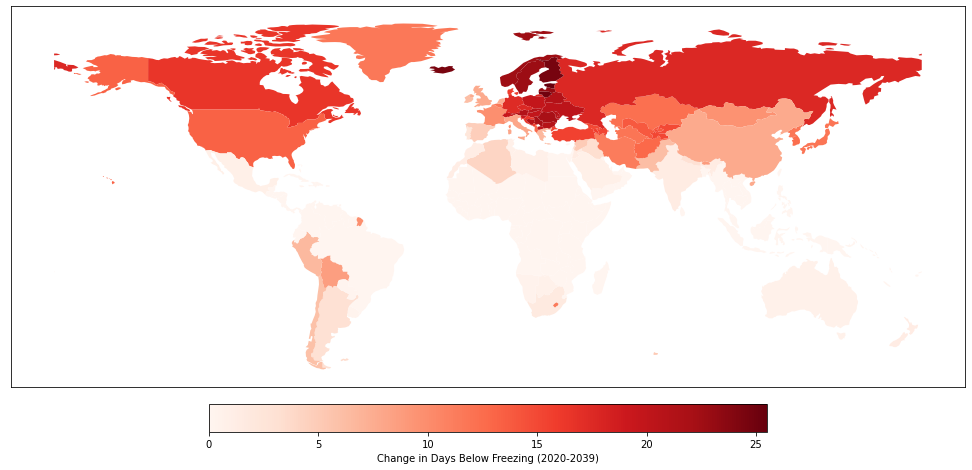

In [45]:
# Load the world map data from geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Add change in days below freezing data to the world geodataframe
merge_data = df[ [('Change Next decades 2020-2039', 0.5), ('Unnamed: 0_level_0', 'ISO')] ]
merge_data.columns = ['change_in_days_below_freezing', 'iso_a3']
world = world.merge(merge_data, on='iso_a3', how='inner')

# Remove Antartica From Plot
world = world[(world.pop_est>0) & (world.name!="Antarctica")]

# Plot world map
fig, ax = plt.subplots(1, 1, figsize=(20,10))
world.plot(column='change_in_days_below_freezing',
           ax=ax,
           legend=True,
           legend_kwds={'label': "Change in Days Below Freezing (2020-2039)",
                        'orientation': "horizontal",
                        'shrink': 0.5,
                        'anchor': (0.5, 2.2)},
           cmap='Reds')

# Remove tick marks and axis labels
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('')
ax.set_ylabel('')

plt.show()

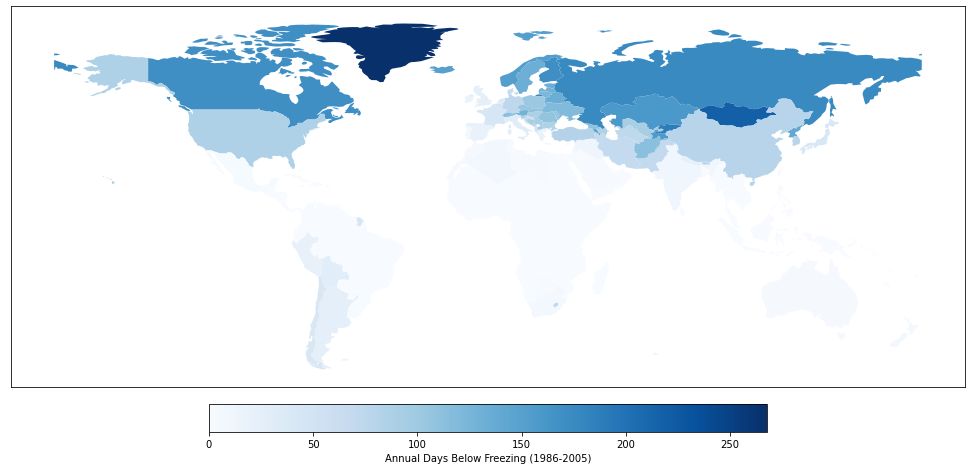

In [49]:
# Load the world map data from geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Remove Antartica From Plot
world = world[(world.pop_est>0) & (world.name!="Antarctica")]

# Add historical days below freezing data to the world geodataframe
merge_data = df[ [('Historical 1986-2005', 0.5), ('Unnamed: 0_level_0', 'ISO')] ]
merge_data.columns = ['historical_days_below_freezing', 'iso_a3']
world = world.merge(merge_data, on='iso_a3', how='inner')

# Plot historical days below freezing on world map
fig, ax = plt.subplots(1, 1, figsize=(20,10))
world.plot(column='historical_days_below_freezing',
           ax=ax,
           legend=True,
           legend_kwds={'label': "Annual Days Below Freezing (1986-2005)",
                        'orientation': "horizontal",
                        'shrink': 0.5,
                        'anchor': (0.5, 2.2)},
           cmap='Blues')

# Remove tick marks and axis labels
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('')
ax.set_ylabel('')

plt.show()